# Tarea 2. Ejercicio 1.
##### Bibliotecas.

##### !pip install optbinning==0.6.1

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
from datetime import date
from dateutil.relativedelta import *
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)
from sklearn import metrics

Utilizaremos la base de datos con el valor de respuesta generado en la tarea 1 ejercicio 1. Recordemos que el umbral establecido es de no más de 2 pagos incumplidos al año. No obstante en un coloquio actuarial el equipo encontró que en los bancos se tiene la convención de 3 pagos incumplidos al año. 
#### Carga de datos.

In [3]:
DF = pd.read_excel('Base.xlsx',index_col=0)
DF.head()

,Dar_Credito,comp_interno1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,1,0.000000,260.869565,25.854639,56.0,-230.0,0.33522,0.000000,b'0',11,58,2,9,156
1,1,0.000000,40.579710,2.872738,62.0,-230.0,0.33334,0.041039,b'1',28,45,1,4,173
2,1,0.000000,119.000000,-230.000000,0.0,0.0,0.29186,0.000000,b'1',25,45,1,9,170
3,1,0.000000,349.275362,34.616490,94.0,-230.0,0.29112,0.000000,b'1',14,59,3,3,159
4,1,2026.342452,276.811594,27.434645,125.0,-230.0,0.27318,77.422135,b'1',1,67,2,9,146


In [4]:
from optbinning import OptimalBinning

Dividimos la muestra en test y train. Esto con el fin de evaluar nuestro modelo.

In [5]:
train, test = train_test_split(DF, test_size = 0.30, random_state = 100) 

Elegimos el tipo de dato que deseamos en cada columna.

In [6]:
y = train.Dar_Credito
optb_comp_interno1 = OptimalBinning(name="comp_interno1", dtype="numerical", solver="cp")
optb_comp_externo1 = OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp")
optb_comp_externo2 = OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp")
optb_comp_externo3 = OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp")
optb_comp_externo4 = OptimalBinning(name="comp_externo4", dtype="categorical", solver="mip")
optb_comp_mixto1 = OptimalBinning(name="comp_mixto1", dtype="numerical", solver="cp")
optb_inversion = OptimalBinning(name="inversion", dtype="numerical", solver="cp")
optb_comp_interno2 = OptimalBinning(name="comp_interno2", dtype="categorical", solver="mip")
optb_comp_interno3 = OptimalBinning(name="comp_interno3", dtype="categorical", solver="mip")
optb_comp_interno4 = OptimalBinning(name="comp_interno4", dtype="categorical", solver="mip")
optb_categoria1 = OptimalBinning(name="categoria1", dtype="categorical", solver="mip")
optb_categoria2 = OptimalBinning(name="categoria2", dtype="categorical", solver="mip")
optb_categoria3 = OptimalBinning(name="categoria3", dtype="categorical", solver="mip")

In [7]:
optb_comp_interno1.fit(train["comp_interno1"].values,y)
optb_comp_externo1.fit(train["comp_externo1"].values,y)
optb_comp_externo2.fit(train["comp_externo2"].values,y)
optb_comp_externo3.fit(train["comp_externo3"].values,y)
optb_comp_externo4.fit(train["comp_externo4"].values,y)
optb_comp_mixto1.fit(train["comp_mixto1"].values,y)
optb_inversion.fit(train["inversion"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_comp_interno3.fit(train["comp_interno3"].values,y)
optb_comp_interno4.fit(train["comp_interno4"].values,y)
optb_categoria1.fit(train["categoria1"].values,y)
optb_categoria2.fit(train["categoria2"].values,y)
optb_categoria3.fit(train["categoria3"].values,y)

OptimalBinning(dtype='categorical', name='categoria3', solver='mip')

In [8]:
comp_interno1 = optb_comp_interno1.binning_table
comp_externo1 = optb_comp_externo1.binning_table
comp_externo2 = optb_comp_externo2.binning_table
comp_externo3 = optb_comp_externo3.binning_table
comp_externo4 = optb_comp_externo4.binning_table
comp_mixto1 = optb_comp_mixto1.binning_table
inversion = optb_inversion.binning_table
comp_interno2 = optb_comp_interno2.binning_table
comp_interno3 = optb_comp_interno3.binning_table
comp_interno4 = optb_comp_interno4.binning_table
categoria1 = optb_categoria1.binning_table
categoria2 = optb_categoria2.binning_table
categoria3 = optb_categoria3.binning_table

Con lo que tenemos ahora, utilicemos la función display para observar el WoE y el IV de las variables (además de la suma de cada una, lo utilizaremos después).

In [9]:
display(comp_interno1.build())
display(comp_externo1.build())
display(comp_externo2.build())
display(comp_externo3.build())
display(comp_externo4.build())
display(comp_mixto1.build())
display(inversion.build())
display(comp_interno2.build())
display(comp_interno3.build())
display(comp_interno4.build())
display(categoria1.build())
display(categoria2.build())
display(categoria3.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 359.68)",17861,0.648100,1257,16604,0.929623,0.00306234,0.000006,7.607301e-07
1,"[359.68, 792.81)",1530,0.055517,140,1390,0.908497,0.288561,0.005236,6.522295e-04
2,"[792.81, 1621.07)",3989,0.144744,295,3694,0.926047,0.0564882,0.000473,5.914599e-05
3,"[1621.07, 2960.99)",1867,0.067746,119,1748,0.936261,-0.103126,0.000689,8.612527e-05
4,"[2960.99, inf)",2312,0.083893,123,2189,0.946799,-0.295038,0.006439,8.020162e-04
5,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000e+00
Totals,,27559,1.000000,1934,25625,0.929823,,0.012844,1.600278e-03


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 40.00)",2526,0.091658,306,2220,0.878860,0.602301,0.043117,0.005310
1,"[40.00, 94.58)",3554,0.128960,381,3173,0.892797,0.464345,0.033979,0.004210
2,"[94.58, 147.03)",3697,0.134149,291,3406,0.921288,0.124007,0.002176,0.000272
3,"[147.03, 219.49)",3637,0.131971,283,3354,0.922189,0.111516,0.001722,0.000215
4,"[219.49, 299.86)",3108,0.112776,178,2930,0.942728,-0.216996,0.004840,0.000604
5,"[299.86, 439.28)",3543,0.128561,182,3361,0.948631,-0.332009,0.012303,0.001531
6,"[439.28, 734.64)",4070,0.147683,190,3880,0.953317,-0.432588,0.023002,0.002853
7,"[734.64, 1103.19)",1843,0.066875,76,1767,0.958763,-0.562327,0.016678,0.002058
8,"[1103.19, inf)",1581,0.057368,47,1534,0.970272,-0.901508,0.032059,0.003877
9,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 3.91)",2261,0.082042,255,2006,0.887218,0.521344,0.027927,0.003452
1,"[3.91, 6.76)",1782,0.064661,187,1595,0.895062,0.440458,0.015172,0.001881
2,"[6.76, 9.37)",1676,0.060815,167,1509,0.900358,0.382769,0.010512,0.001306
3,"[9.37, 14.57)",3505,0.127182,283,3222,0.919258,0.151667,0.003123,0.000390
4,"[14.57, 21.75)",3579,0.129867,273,3306,0.923722,0.0899556,0.001092,0.000137
5,"[21.75, 29.72)",2856,0.103632,156,2700,0.945378,-0.267173,0.006600,0.000823
6,"[29.72, 100.56)",8785,0.318771,459,8326,0.947752,-0.31411,0.027511,0.003425
7,"[100.56, inf)",3115,0.113030,154,2961,0.950562,-0.372352,0.013376,0.001662
8,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, -229.50)",1648,0.059799,115,1533,0.930218,-0.00607171,0.000002,2.748476e-07
1,"[-229.50, 1.50)",2223,0.080663,262,1961,0.882141,0.571113,0.033663,4.151666e-03
2,"[1.50, 56.50)",2720,0.098697,508,2212,0.813235,1.11281,0.196239,2.333774e-02
3,"[56.50, 71.50)",2490,0.090352,265,2225,0.893574,0.456196,0.022898,2.837633e-03
4,"[71.50, 79.50)",1739,0.063101,157,1582,0.909718,0.273779,0.005323,6.632913e-04
5,"[79.50, 87.50)",1777,0.064480,134,1643,0.924592,0.0775387,0.000401,5.009084e-05
6,"[87.50, 93.50)",1520,0.055154,108,1412,0.928947,0.0133468,0.000010,1.235198e-06
7,"[93.50, 104.50)",2724,0.098842,147,2577,0.946035,-0.279971,0.006875,8.566291e-04
8,"[104.50, 112.50)",2453,0.089009,84,2369,0.965756,-0.755428,0.037028,4.521452e-03
9,"[112.50, 119.50)",2467,0.089517,65,2402,0.973652,-1.02569,0.061672,7.387938e-03


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-228.0, -229.0]",1960,0.071120,299,1661,0.847449,0.869247,0.078043,0.009459
1,[0.0],3277,0.118909,295,2982,0.909979,0.270604,0.009786,0.001220
2,"[9999999769.99, -230.0, -227.0]",22322,0.809971,1340,20982,0.939970,-0.167017,0.021035,0.002626
3,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.108864,0.013305


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.27)",2178,0.079030,78,2100,0.964187,-0.709006,0.029509,0.003613
1,"[0.27, 0.31)",3545,0.128633,132,3413,0.962764,-0.668567,0.043415,0.005328
2,"[0.31, 0.32)",1425,0.051707,63,1362,0.955789,-0.489597,0.010074,0.001247
3,"[0.32, 0.33)",1458,0.052905,86,1372,0.941015,-0.185699,0.001685,0.000210
4,"[0.33, 0.34)",1852,0.067201,117,1735,0.936825,-0.112611,0.000812,0.000101
5,"[0.34, 0.36)",6085,0.220799,431,5654,0.929170,0.00996759,0.000022,0.000003
6,"[0.36, 0.37)",2842,0.103124,255,2587,0.910274,0.266987,0.008249,0.001028
7,"[0.37, 0.37)",1442,0.052324,188,1254,0.869626,0.686326,0.033130,0.004062
8,"[0.37, 0.37)",1900,0.068943,212,1688,0.888421,0.509265,0.022277,0.002755
9,"[0.37, inf)",4832,0.175333,372,4460,0.923013,0.0999678,0.001829,0.000229


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.00)",17865,0.648246,1319,16546,0.926168,0.0547075,0.001986,0.000248
1,"[0.00, 5.94)",2371,0.086034,254,2117,0.892872,0.463557,0.022584,0.002798
2,"[5.94, 36.06)",2907,0.105483,175,2732,0.939800,-0.164025,0.002645,0.000330
3,"[36.06, 187.96)",2539,0.092130,134,2405,0.947223,-0.303487,0.007456,0.000928
4,"[187.96, inf)",1877,0.068108,52,1825,0.972296,-0.974114,0.043185,0.005194
5,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.077857,0.009499


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[b'0'],8247,0.299249,586,7661,0.928944,0.0134,0.000054,0.000007
1,[b'1'],19312,0.700751,1348,17964,0.930199,-0.0057697,0.000023,0.000003
2,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.000077,0.000010


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[13, 29, 30, 27, 12]",1542,0.055953,212,1330,0.862516,0.74763,0.043149,0.005271
1,"[7, 20, 28, 15, 23]",3768,0.136725,371,3397,0.901539,0.369532,0.021900,0.002722
2,"[17, 24, 8]",1775,0.064407,161,1614,0.909296,0.278912,0.005651,0.000704
3,"[21, 31, 18]",1769,0.064190,137,1632,0.922555,0.106397,0.000761,0.000095
4,"[9, 5, 4, 11]",2440,0.088537,167,2273,0.931557,-0.026884,0.000063,0.000008
5,"[10, 19]",3980,0.144417,245,3735,0.938442,-0.140267,0.002676,0.000334
6,[14],2954,0.107188,175,2779,0.940758,-0.181082,0.003253,0.000406
7,"[25, 26]",1539,0.055844,90,1449,0.941520,-0.194841,0.001950,0.000243
8,"[6, 22]",1859,0.067455,99,1760,0.946746,-0.293971,0.005143,0.000641
9,[1],3927,0.142494,205,3722,0.947797,-0.315028,0.012365,0.001539


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[27, 31, 38, 39, 37, 60, 58]",1892,0.068653,196,1696,0.896406,0.426065,0.014980,1.858466e-03
1,"[57, 56, 54]",2656,0.096375,232,2424,0.912651,0.237541,0.006025,7.513439e-04
2,"[61, 36, 44]",1519,0.055118,122,1397,0.919684,0.145917,0.001250,1.560768e-04
3,"[53, 63, 55]",2496,0.090569,194,2302,0.922276,0.110303,0.001156,1.443693e-04
4,"[50, 43, 51]",2865,0.103959,213,2652,0.925654,0.0622009,0.000413,5.163202e-05
5,"[33, 42, 64, 46]",2140,0.077652,149,1991,0.930374,-0.00846796,0.000006,6.934832e-07
6,"[41, 65, 40, 45]",2069,0.075075,141,1928,0.931851,-0.0315005,0.000073,9.186478e-06
7,"[66, 47]",1589,0.057658,106,1483,0.933291,-0.0544052,0.000167,2.083792e-05
8,"[67, 49]",1579,0.057295,104,1475,0.934136,-0.0680443,0.000258,3.219930e-05
9,"[52, 69]",1519,0.055118,98,1421,0.935484,-0.0901706,0.000431,5.387533e-05


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],12546,0.455241,1112,11434,0.911366,0.253547,0.032649,0.004070
1,"[5, 4, 6, 2]",9077,0.329366,529,8548,0.941721,-0.198486,0.011920,0.001488
2,[3],5936,0.215392,293,5643,0.950640,-0.37402,0.025701,0.003194
3,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.070270,0.008752


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[13, 4, 1, 10, 6]",4728,0.171559,487,4241,0.896997,0.419688,0.036222,0.004495
1,"[7, 8]",1679,0.060924,125,1554,0.925551,0.0637042,0.000254,0.000032
2,[3],1746,0.063355,112,1634,0.935853,-0.0963094,0.000564,0.000070
3,[9],17686,0.641750,1132,16554,0.935995,-0.0986637,0.005988,0.000748
4,"[5, 11, 2, 12]",1720,0.062412,78,1642,0.954651,-0.462983,0.010995,0.001362
5,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,27559,1.000000,1934,25625,0.929823,,0.054023,0.006707


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[158, 174, 175, 172, 157]",1542,0.055953,212,1330,0.862516,0.74763,0.043149,0.005271
1,"[152, 165, 173, 160, 168]",3768,0.136725,371,3397,0.901539,0.369532,0.021900,0.002722
2,"[162, 169, 153]",1775,0.064407,161,1614,0.909296,0.278912,0.005651,0.000704
3,"[166, 176, 163]",1769,0.064190,137,1632,0.922555,0.106397,0.000761,0.000095
4,"[154, 150, 149, 156]",2440,0.088537,167,2273,0.931557,-0.026884,0.000063,0.000008
5,"[155, 164]",3980,0.144417,245,3735,0.938442,-0.140267,0.002676,0.000334
6,[159],2954,0.107188,175,2779,0.940758,-0.181082,0.003253,0.000406
7,"[170, 171]",1539,0.055844,90,1449,0.941520,-0.194841,0.001950,0.000243
8,"[151, 167]",1859,0.067455,99,1760,0.946746,-0.293971,0.005143,0.000641
9,[146],3927,0.142494,205,3722,0.947797,-0.315028,0.012365,0.001539


Quitamos todas las columnas donde $$\sum IV < 2\%$$ Es decir no utilizaremos las variables que no están aportando mucha información.

Ahora revisemos la tasa de personas a las que no se les dio crédito basado en cada variable.

Para el componente interno, notamos que las variables "normales" la tendencia de la tasa es creciente pero no crece con fuerza. Sin embargo con los WoEs tenemos que a medida que el componente externo 1 crece la tasa de "malos" baja. 

El comporamiento descrito anteriormente, se comporta igual para el resto de variables.

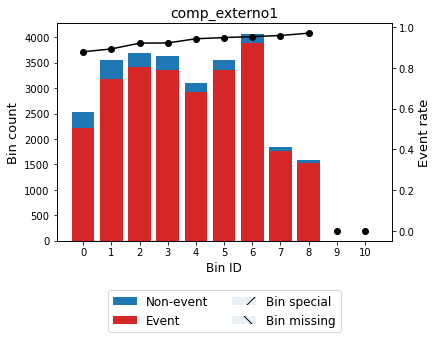

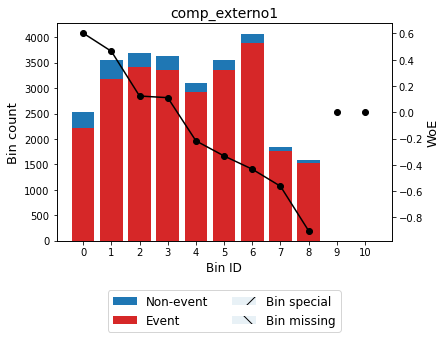

In [10]:
comp_externo1.plot(metric="event_rate")
comp_externo1.plot(metric="woe")

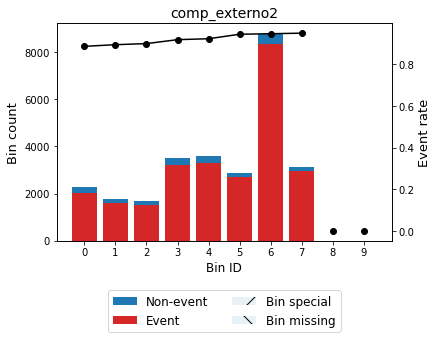

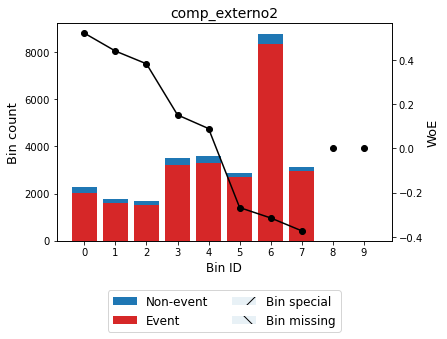

In [11]:
comp_externo2.plot(metric="event_rate")
comp_externo2.plot(metric="woe")

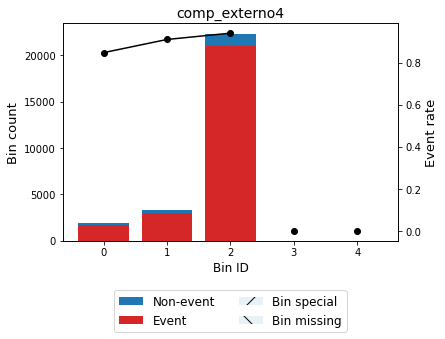

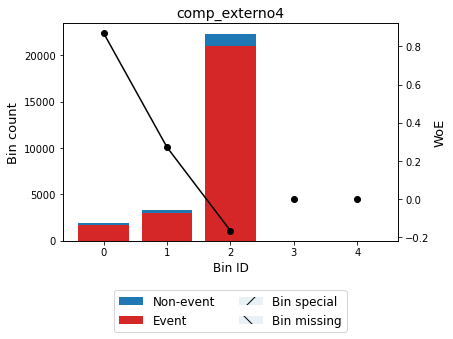

In [12]:
comp_externo4.plot(metric="event_rate")
comp_externo4.plot(metric="woe")

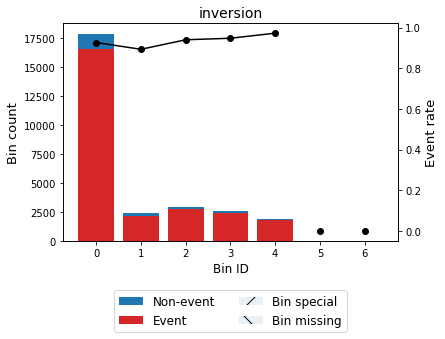

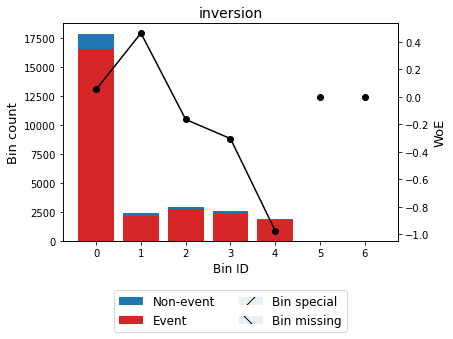

In [13]:
inversion.plot(metric="event_rate")
inversion.plot(metric="woe")

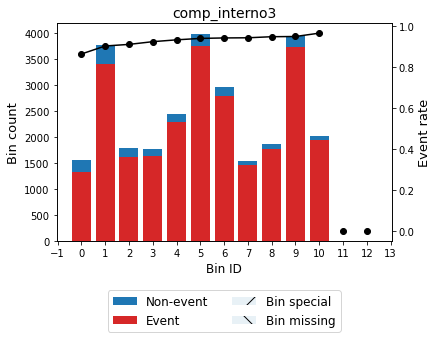

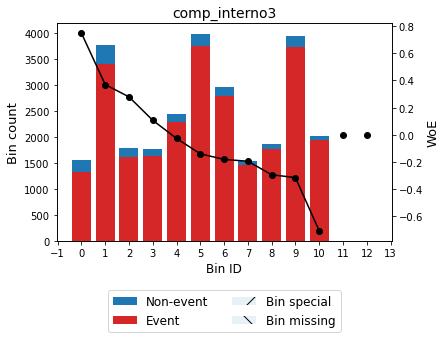

In [14]:
comp_interno3.plot(metric="event_rate")
comp_interno3.plot(metric="woe")

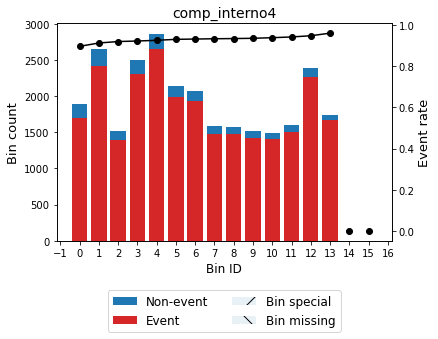

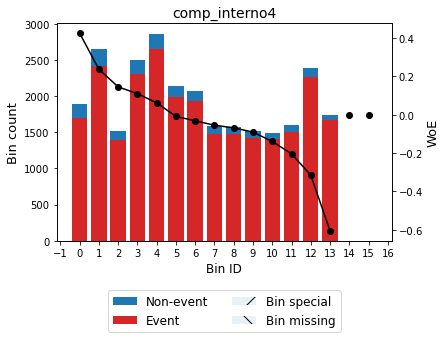

In [15]:
comp_interno4.plot(metric="event_rate")
comp_interno4.plot(metric="woe")

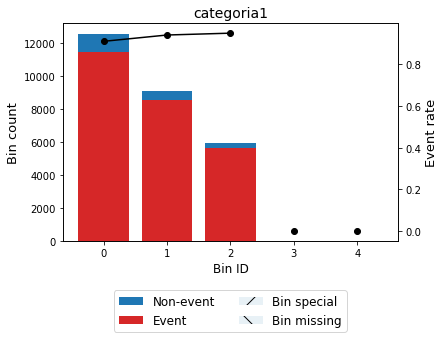

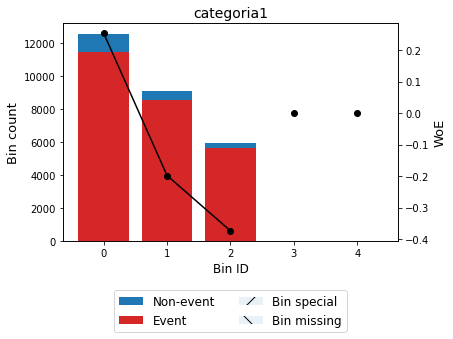

In [16]:
categoria1.plot(metric="event_rate")
categoria1.plot(metric="woe")

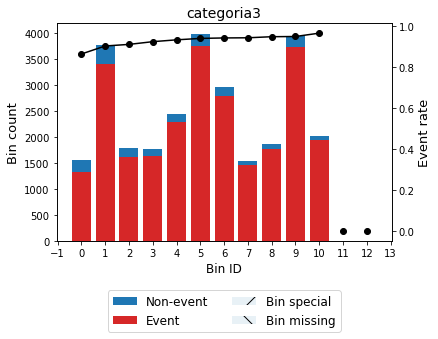

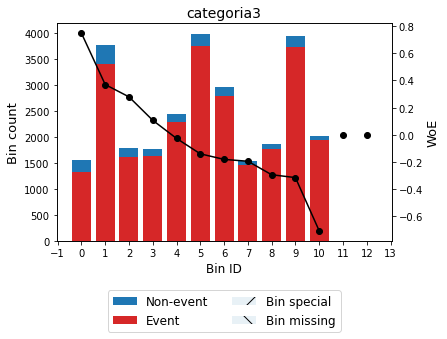

In [17]:
categoria3.plot(metric="event_rate")
categoria3.plot(metric="woe")

Ya que analizamos los WoEs, anexemos la información a nuestro data set.

In [18]:
#Transformamos las variables a woe

train["woe_comp_externo1"] = optb_comp_externo1.transform(train["comp_externo1"], metric="woe")
train["woe_comp_externo2"] = optb_comp_externo2.transform(train["comp_externo2"], metric="woe")
train["woe_comp_externo4"] = optb_comp_externo4.transform(train["comp_externo4"], metric="woe")
train["woe_inversion"] = optb_inversion.transform(train["inversion"], metric="woe")
train["woe_comp_interno3"] = optb_comp_interno3.transform(train["comp_interno3"], metric="woe")
train["woe_comp_interno4"] = optb_comp_interno4.transform(train["comp_interno4"], metric="woe")
train["woe_categoria1"] = optb_categoria1.transform(train["categoria1"], metric="woe")
train["woe_categoria3"] = optb_categoria3.transform(train["categoria3"], metric="woe")

test["woe_comp_externo1"] = optb_comp_externo1.transform(test["comp_externo1"], metric="woe")
test["woe_comp_externo2"] = optb_comp_externo2.transform(test["comp_externo2"], metric="woe")
test["woe_comp_externo4"] = optb_comp_externo4.transform(test["comp_externo4"], metric="woe")
test["woe_inversion"] = optb_inversion.transform(test["inversion"], metric="woe")
test["woe_comp_interno3"] = optb_comp_interno3.transform(test["comp_interno3"], metric="woe")
test["woe_comp_interno4"] = optb_comp_interno4.transform(test["comp_interno4"], metric="woe")
test["woe_categoria1"] = optb_categoria1.transform(test["categoria1"], metric="woe")
test["woe_categoria3"] = optb_categoria3.transform(test["categoria3"], metric="woe")

Veamos el correlograma de las variables.En caso de que exista mucha correlación, eliminaremos las que tengan el IV más pequeño.

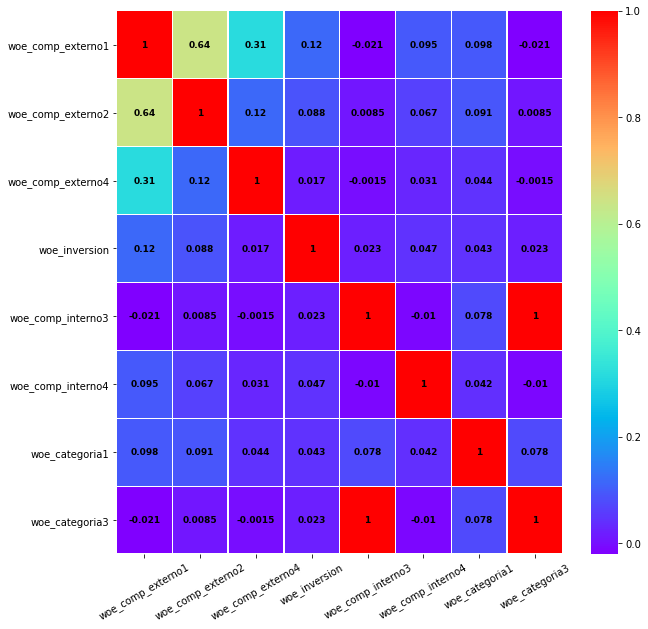

In [19]:
corr = train.iloc[:,14:].corr()

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

Ahora quitamos una de las variables en donde se tiene que $$|corr|\leq 0.5$$ y la IV es menor. Es decir woe_comp_externo2 y woe_categoria3.

In [21]:
train = train.drop(["woe_comp_externo2","woe_categoria3"],axis=1)
test = test.drop(["woe_comp_externo2","woe_categoria3"],axis=1)

Analicemos el correlograma con las variables que aún nos quedan.
Notemos que la correlación una a una es "pequeña".

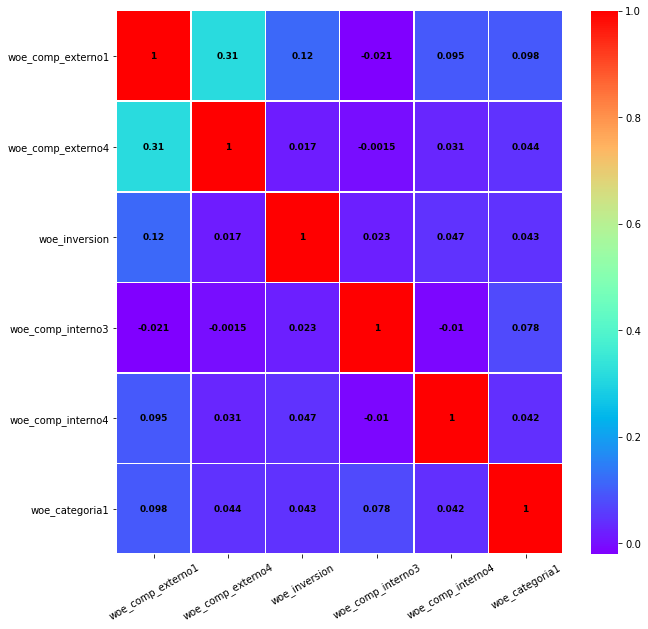

In [22]:
corr = train.iloc[:,14:].corr()

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

# Modelo.

Ahora si, generemos el modelo y después observaremos las métricas para evuluarlo.

In [23]:
X_woe_train=train.iloc[:,14:]
y_train=train.iloc[:,0]

In [36]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

### Train.

Evaluemos el modelo con la muestra train.
Tenemos un AUC de 0.69, Gini de 37% y KS de 27%. Es decir, parece ser un buen modelo, veamos que ocurre con la muestra test.

In [66]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

GINI = (2 * roc_auc) - 1
print(GINI)

AttributeError: 'function' object has no attribute 'predict'

In [29]:
#Obtenemos el predict
y_pr_fit= clf.predict_proba(X_woe_train)
len(y_pr_fit[:,0])
df_predicts=y_train.to_frame()
df_predicts['estimado']=y_pr_fit[:,1]
df_predicts
#Construcción de Scorecard
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp
#KS
ecdf_malos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==0.0,'estimado'])
ecdf_buenos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==1.0,'estimado'])
grid_score=np.sort(df_predicts.estimado.unique())
prob_acum_buenos=ecdf_buenos(grid_score)
prob_acum_malos=ecdf_malos(grid_score)
abs_dif=np.abs(prob_acum_buenos-prob_acum_malos)
KS= np.max (abs_dif)
KS

0.27223154337024247

### Test.

Tenemos un AUC de 0.65, Gini de 30% y KS de 22%. Es decir, parece ser un buen modelo, veamos que ocurre con la muestra test.

In [30]:
X_woe_test=test.iloc[:,14:]
y_test=test.iloc[:,0]

y_pred
 [1 1 1 ... 1 1 1]
y_pred1
 [3.14851606 2.64045431 3.39366166 ... 3.16001712 1.99035483 3.64342016]


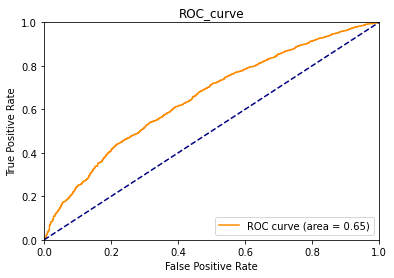

0.30744703382764893


In [31]:
y_pred=clf.predict(X_woe_test)
y_pred1=clf.decision_function(X_woe_test)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

GINI = (2 * roc_auc) - 1
print(GINI)

#El gini es sospechoso si es menor al 35%

In [32]:
#Obtenemos el predict
y_pr_fit= clf.predict_proba(X_woe_test)
len(y_pr_fit[:,0])
df_predicts=y_test.to_frame()
df_predicts['estimado']=y_pr_fit[:,1]
df_predicts
#Construcción de Scorecard
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp
#KS
ecdf_malos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==0.0,'estimado'])
ecdf_buenos=ECDF(df_predicts.loc[df_predicts.Dar_Credito==1.0,'estimado'])
grid_score=np.sort(df_predicts.estimado.unique())
prob_acum_buenos=ecdf_buenos(grid_score)
prob_acum_malos=ecdf_malos(grid_score)
abs_dif=np.abs(prob_acum_buenos-prob_acum_malos)
KS= np.max (abs_dif)
KS

0.22477649407517813

Finalmente realicemos validación cruzada para el AUC con la muestra test.

In [48]:
k_fold_test = StratifiedKFold(5, shuffle=True, random_state=42)
cross_val_test = cross_val_score(clf, X_woe_test, y_test, cv=k_fold_test)
validacion_test = cross_validate(clf, X_woe_test, y_test, cv=k_fold_test,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])
# Media de Roc-Auc en validación de test.
roc_auc_array=validacion_train['test_roc_auc']
roc_auc_array.mean()

0.6865875119312707